<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This lab is intended to help get you more familiar with K-Means clustering, and clustering in general.  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
%matplotlib inline

In [38]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [90]:
# A:
X = pd.DataFrame(df,columns = ['Pu239','Pu240'])
X

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223
5,79.116,18.548
6,75.751,21.162
7,75.326,21.557
8,63.287,24.493
9,59.553,25.576


### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [40]:
# A:
km = KMeans(n_clusters = 3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [41]:
# A: 
df['clusters'] = km.labels_

### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [42]:
# A:
centroids = pd.DataFrame(km.cluster_centers_,columns = ['Pu239','Pu240'])
centroids

,Pu239,Pu240
0,76.593000,20.194833
1,60.633933,24.387533
2,71.573167,19.973917


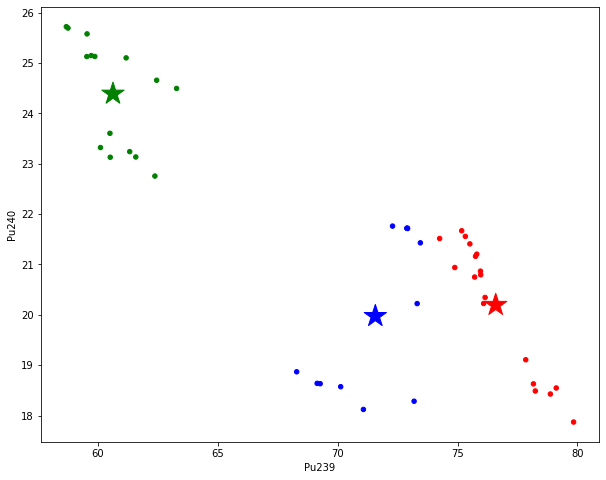

In [43]:
colors = ["red", "green", "blue"]
df['colors'] = df['clusters'].map(lambda p: colors[p])
ax = X.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),c=df['colors'])
centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*",ax=ax,s=550,c=['r','g','b'])

# adapted from Tim Book https://git.generalassemb.ly/DSI-US-11/8.01-lesson-intro-to-kmeans/blob/master/solutions/solution-code.ipynb

In [92]:
silhouette_score(X,km.labels_)

0.5342202492727395

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [68]:
data = pd.read_csv(csv_file)

In [69]:
X = pd.DataFrame(data,columns = ['Pu239','Pu240'])
X

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223
5,79.116,18.548
6,75.751,21.162
7,75.326,21.557
8,63.287,24.493
9,59.553,25.576


In [85]:
# A:
ss = StandardScaler()
Z = ss.fit_transform(X)
Z = pd.DataFrame(data,columns = ['Pu239','Pu240'])

In [86]:
kmsc = KMeans(n_clusters = 3)
kmsc.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
data['clusters']= kmsc.labels_
data.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,clusters,colors
0,1,0.126,75.804,21.204,2.180,2,blue
1,2,0.133,75.515,21.408,2.240,2,blue
2,3,0.127,75.175,21.668,2.305,2,blue
3,4,0.156,78.872,18.428,1.906,2,red
4,5,0.503,73.317,20.223,4.128,0,blue


In [88]:
centroids = pd.DataFrame(kmsc.cluster_centers_,columns = ['Pu239','Pu240'])
centroids

,Pu239,Pu240
0,71.573167,19.973917
1,60.633933,24.387533
2,76.593000,20.194833


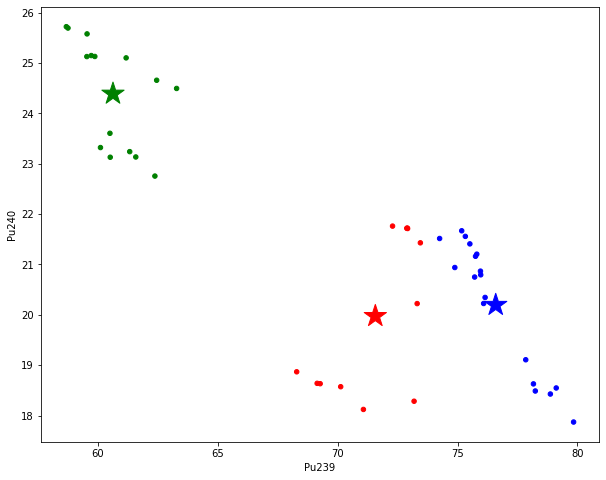

In [89]:
colors = ["red", "green", "blue"]
data['colors'] = data['clusters'].map(lambda p: colors[p])
ax = Z.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),c=data['colors'])
centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*",ax=ax,s=550,c=['r','g','b'])

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [93]:
 silhouette_score(Z,kmsc.labels_)

0.5950619279181214